In [1]:
import json
import os

from nb_utils import train_eval_forecast

In [2]:
import mlflow
from datetime import datetime

In [3]:
with open('train_config.json') as f_train, \
    open('test_config.json') as f_test, \
    open('forecast_config.json') as f_forecast:
    default_train_config = json.load(f_train)
    default_test_config = json.load(f_test)
    default_forecast_config = json.load(f_forecast)

In [4]:
model_class = 'SEIHRD'
default_train_config['model_class'] = model_class
default_test_config['model_class'] = model_class
default_forecast_config['model_class'] = model_class

In [5]:
region = 'mumbai'
region_type = 'district'
train1_start_date = '4/8/20'
train1_end_date = '4/17/20'
train2_start_date = '4/13/20'
train2_end_date = '4/22/20'
test_run_day = '4/17/20'
test_start_date = '4/18/20'
test_end_date = '4/22/20'
forecast_run_day = '4/12/20'
forecast_start_date = '4/13/20'
forecast_end_date = '4/22/20'

t = 10.90                                            
100%|██████████| 1/1 [00:00<00:00, 11.47trial/s, best loss: 16136.672180031956]
Best fit: {'EbyCRatio': 22.163739238987155, 'F_fatalities': 0.08807261364088172, 'F_hospitalization': 0.12139596212096501, 'IbyCRatio': 0.23643818193474098, 'infectious_period': 4.458484858998559, 'r0': 1.5827756628017626}
Best Loss: 16136.672180031956
t = 10.90
t = 10.90
t = 5.90
t = 10.90                                            
100%|██████████| 1/1 [00:00<00:00, 13.07trial/s, best loss: 68109.54165278704]
Best fit: {'EbyCRatio': 69.90137068024967, 'F_fatalities': 0.030181060639779028, 'F_hospitalization': 0.12058235433584069, 'IbyCRatio': 0.17015578619479765, 'infectious_period': 8.961267669270788, 'r0': 2.6392577982498118}
Best Loss: 68109.54165278704
t = 10.90
t = 10.90
t = 10.90


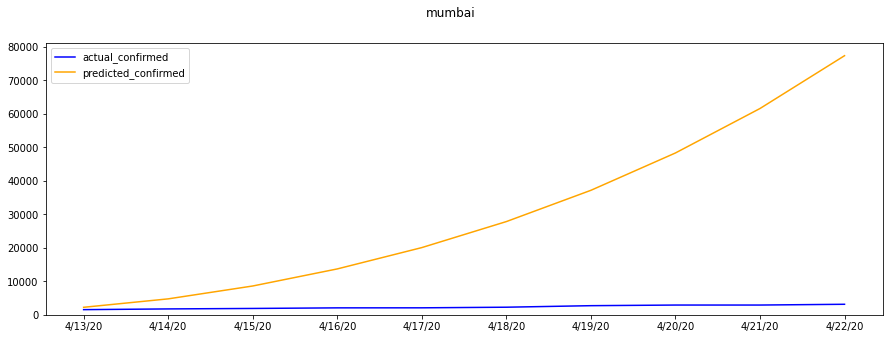

In [6]:
forecast_df, params, metrics, model_params = train_eval_forecast(region, region_type, 
                                                                 train1_start_date, train1_end_date,
                                                                 train2_start_date, train2_end_date,
                                                                 test_run_day, test_start_date, test_end_date,
                                                                 forecast_run_day, forecast_start_date, forecast_end_date,
                                                                 default_train_config, default_test_config,
                                                                 default_forecast_config, max_evals = 1,
                                                                 data_source = None, mlflow_log = True, name_prefix = None,
                                                                 plot_actual_vs_predicted = False, plot_name = 'default.png')

## MLFlow config

In [8]:
mlflow.set_tracking_uri("http://ec2-54-175-207-176.compute-1.amazonaws.com")
mlflow.set_experiment("seir_trial")

t = 10.90                                            
100%|██████████| 1/1 [00:00<00:00, 13.16trial/s, best loss: 43927.69511806351]
Best fit: {'EbyCRatio': 47.15684736585484, 'F_fatalities': 0.08345811165267222, 'F_hospitalization': 0.08528397021725678, 'IbyCRatio': 1.7922211739881564, 'infectious_period': 1.927764110663917, 'r0': 0.7074218646085817}
Best Loss: 43927.69511806351
t = 10.90
t = 10.90
t = 5.90
t = 10.90                                            
100%|██████████| 1/1 [00:00<00:00, 12.69trial/s, best loss: 75452.6916003551]
Best fit: {'EbyCRatio': 53.357425079321786, 'F_fatalities': 0.11602949418900207, 'F_hospitalization': 0.06561547034220952, 'IbyCRatio': 0.30527817394975676, 'infectious_period': 3.1674982220388106, 'r0': 0.5061772527466193}
Best Loss: 75452.6916003551
t = 10.90
t = 10.90
t = 38.90


SSLError: SSL validation failed for https://an-mlflow-test.s3.ap-south-1.amazonaws.com/4/b4cae1507d484a4c8e3f6adc60ad1a6b/artifacts/mumbai_5-20-20_2020-05-23%2020%3A43%3A22.038445.png [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:852)

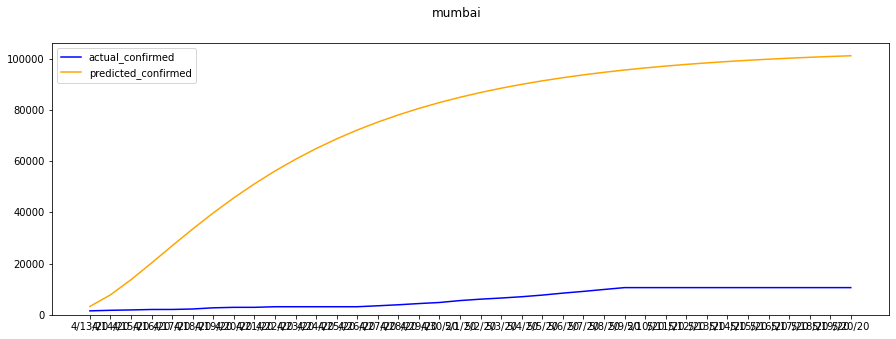

In [9]:
trials = [{'region':'mumbai','region_type':'district','forecast_end_date':'5/20/20'}]

for trial in trials:
    region = trial['region']
    region_type = trial['region_type']
    forecast_end_date = trial['forecast_end_date']
    name_prefix = "{}_{}_{}".format(region, region_type, datetime.now())
    plot_name = '{}_{}_{}.png'.format(region, forecast_end_date.replace('/', '-'), datetime.now())
    
    with mlflow.start_run():
        forecast_df, params, metrics, model_params = train_eval_forecast(region, region_type, 
                                                                         train1_start_date, train1_end_date,
                                                                         train2_start_date, train2_end_date,
                                                                         test_run_day, test_start_date, test_end_date,
                                                                         forecast_run_day, forecast_start_date, forecast_end_date,
                                                                         default_train_config, default_test_config,
                                                                         default_forecast_config, max_evals = 1,
                                                                         data_source = None, mlflow_log = True, name_prefix = None,
                                                                         plot_actual_vs_predicted = False, plot_name = plot_name)
        # Temporary fix for nested dictionary
        del metrics['Train1All']
        del metrics['Train2All']
        del metrics['TestAll']
        
        mlflow.log_params(params)
        mlflow.log_metrics(metrics)
        mlflow.log_artifact(plot_name)
        mlflow.log_artifact('train_config.json')
        mlflow.log_artifact('train1_output.json')
        mlflow.log_artifact('test_output.json')
        mlflow.log_artifact('train2_output.json')